**Connecting colab with kaggal to download dataset**

In [1]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.4 MB/s 
     |████████████████████████████████| 155 kB 10.1 MB/s 
     |████████████████████████████████| 247 kB 37.9 MB/s 
     |████████████████████████████████| 62 kB 652 kB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 140 kB 52.4 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 61 kB 92 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=d7252b83f9199eeb15bba3ef481cc4c6740721987c7593d1b24eb585779409a4
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabafatimaa1101","key":"25d476a72cc1761b45e90058aaf3575e"}'}

In [3]:
!mkdir ~/.kaggle #created at root folder in colab

In [4]:
#copy
!cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10785        316  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1778         52  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6729        149  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [7]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:02<00:00, 210MB/s]
100% 346M/346M [00:02<00:00, 163MB/s]


In [8]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet 

**Sending data to google drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

**Importing required libraries**

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import cv2 as cv
from tensorflow.keras.layers import Dense, RandomFlip, RandomRotation, RandomZoom, RandomWidth, RandomHeight, Rescaling
from tensorflow.keras import Sequential
from tensorflow.keras.activations import softmax

**Setting up Random Seed**

In [12]:
RANDOM_SEED: int = 42

In [25]:
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.experimental.numpy.random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

**Setting up Hyperparameters**

In [13]:
BATCH_SIZE: int = 32
EPOCHS: int = 10
IMAGE_SIZE = (150, 150)
AUGMENTATION_FACTOR: float = 0.2
LABEL_MODEL: str = "categorical"


**Preprocessing data**

**Get class names (labels)**

In [14]:
import pathlib
data_dir = pathlib.Path("/content/seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

**Setting directories and Checking the type of images in each set**

In [15]:
train_path = '/content/seg_train/seg_train'
test_path = '/content/seg_test/seg_test'

print("type of Images in Train dataset"+str(os.listdir(train_path)))
print("type of Images in Test dataset"+str(os.listdir(test_path)))

type of Images in Train dataset['glacier', 'forest', 'mountain', 'buildings', 'street', 'sea']
type of Images in Test dataset['glacier', 'forest', 'mountain', 'buildings', 'street', 'sea']


**Getting number of files in each folder**

In [16]:
print("Training data:")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_path,
    label_mode=LABEL_MODEL,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
)

print("Testing data:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_path,
    label_mode=LABEL_MODEL,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)

Training data:
Found 14034 files belonging to 6 classes.
Testing data:
Found 3000 files belonging to 6 classes.


**Visualize random image from dataset**

Image shape: (150, 150, 3)


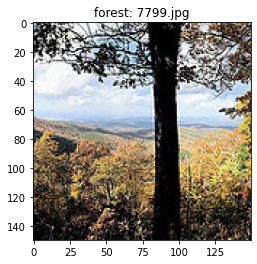

In [17]:
# visualize random image from train set
target_class = random.choice(class_names)
target_folder: str = '/content/seg_train/seg_train/' + target_class

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(f"{target_class}: {random_image[0]}")

print(f"Image shape: {img.shape}")

**Visualize image from each class label**

glacier images:


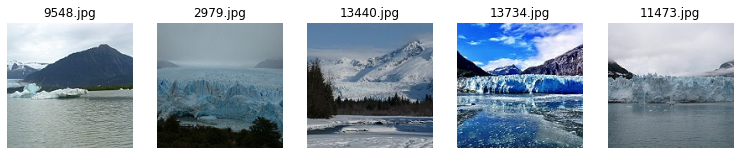

forest images:


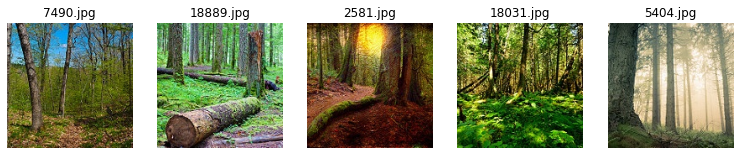

mountain images:


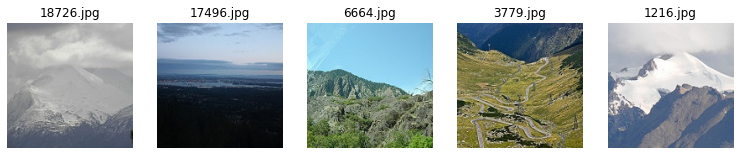

buildings images:


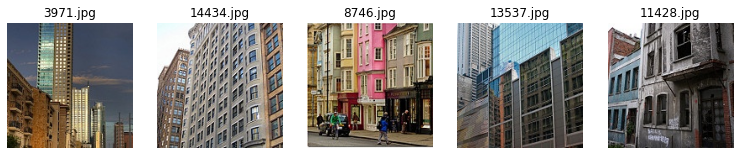

street images:


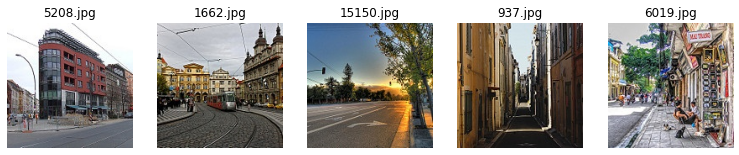

sea images:


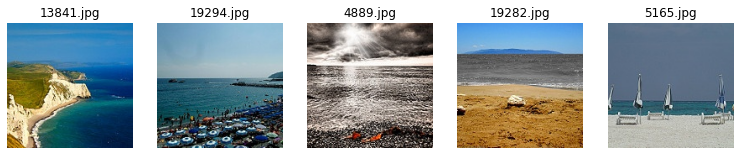

In [18]:
rows, cols = (1, 5)
import matplotlib.pyplot as plt
for categories in os.listdir(train_path):
    print(f'{categories} images:')
    path = f'{train_path}/{categories}'    
    fig = plt.figure(figsize = (13, 8))
    for i in range(rows * cols):
        fig.add_subplot(rows, cols, i+1)
        image_id = os.listdir(path)[np.random.randint(0, 2000)]
        image = cv.imread(path + f'/{image_id}')
        plt.imshow(image[:, :, ::-1])
        plt.title(image_id)
        plt.axis('off')
    plt.show()

**Create and Visualize augmentation layer**

Image augmentation is one useful technique in building convolutional neural networks that can increase the size of the training set without acquiring new images. The idea is simple; duplicate images with some kind of variation so the model can learn from more examples.

It improves the model prediction accuracy. It prevents data scarcity. It frames better data models. It reduces data overfitting.

In [19]:
augmentation_layer = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(AUGMENTATION_FACTOR),
    RandomZoom(AUGMENTATION_FACTOR),
    RandomWidth(AUGMENTATION_FACTOR),
    RandomHeight(AUGMENTATION_FACTOR),
    Rescaling(1./255)
], name="augmentation_layer")

augmentation_layer

/content/seg_train/seg_train/sea/13212.jpg


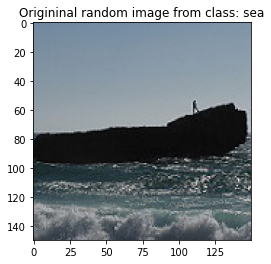

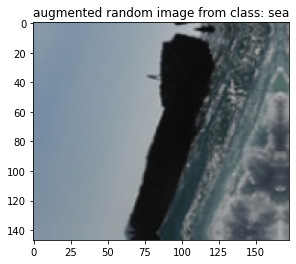

In [20]:
# checking augmentation layer results on random image 
target_dir = train_path
target_class = random.choice(class_names)
target_dir = f"{target_dir}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)

plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(augmented_image)

**Creating ten backbone base model using ResNet50V2**

In [21]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)

base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

# Creating input layer
input_layer = tf.keras.layers.Input(shape=IMAGE_SIZE + (3,), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2d_layer")(x)
output_layer = Dense(len(class_names), activation=softmax, name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
# base_model.summary()

In [22]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling_2d_l  (None, 2048)             0         
 ayer (GlobalAveragePooling2                                     
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                             

**Tensorflow Callbacks**

In [23]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

# set checkpoint path
checkpoint_path = "checkpoint_weights/checkpoint.cpk"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq="epoch", #save every epoch
    verbose=1
)

**Compile the model**

In [24]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

**Fit the model**

In [ ]:
history_1 = model_1.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
        checkpoint_callback
    ]
)

Epoch 1/10
439/439 [==============================] - ETA: 0s - loss: 0.5619 - accuracy: 0.7960
Epoch 1: val_loss improved from inf to 0.17941, saving model to checkpoint_weights/checkpoint.cpk
439/439 [==============================] - 1219s 3s/step - loss: 0.5619 - accuracy: 0.7960 - val_loss: 0.1794 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 2/10
 19/439 [>.............................] - ETA: 20:30 - loss: 0.4160 - accuracy: 0.8487

In [ ]:
# load in saved model wights and evaluate model
model_1.load_weights(checkpoint_path)

In [ ]:
model_1.evaluate(test_data)

**Ploting Loss and Accuracy**

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
    loss = history_1.history['loss']
    val_loss = history_1.history['val_loss']

    accuracy = history_1.history["accuracy"]
    val_accuracy = history_1.history["val_accuracy"]

    epochs = range(len(history_1.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [ ]:
plot_loss_curve(history_1)

**Improving the model**

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)


base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

In [ ]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [ ]:
history_1.epoch[-1]

In [ ]:
# fine tune for another 5 epochs

fine_tune_epochs = EPOCHS + 5

# Refit the model (same as model_2 except with more trainable layers)
history_2 = model_1.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(test_data)),
    initial_epoch=history_1.epoch[-1],
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
        checkpoint_callback
    ]
)

**Comparing the performance history of model1 and the tuned model**

In [ ]:
# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5, metric: str = "accuracy"):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history[metric]
  loss = original_history.history["loss"]

  val_acc = original_history.history[f"val_{metric}"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history[metric]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history[f"val_{metric}"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

In [ ]:
compare_historys(history_1, history_2)

In [ ]:
# load in saved model weights and evaluate model
model_1.load_weights(checkpoint_path)

In [ ]:
model_1.evaluate(test_data)

**Making predictions**

In [ ]:
# Make predictions with model
preds_probs = model_1.predict(test_data)
preds_probs[:10]

In [ ]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

In [ ]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

**Reports**

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

**Make_confusio_matrix function explanation:**
Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.

    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:

    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:

    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  # Makes a labelled confusion matrix comparing predictions and ground truth labels.
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=50)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

def get_f1_score_on_every_class_name(y_labels, y_true, class_names):
    """Return f1 score on every class name as a dataframe

    Args:
        y_labels (_type_): y_true of test_
        y_pred (_type_): predictions list

    Returns:
        pd.DataFrame: f1-scores dataframe on every class name
    """
    classification_report_dict = classification_report(y_labels, y_true, output_dict=True)
    # Create empty dictionary
    class_f1_scores = {}
    # Loop through classification report dictionary items
    for k, v in classification_report_dict.items():
        if k == "accuracy": # stop once we get to accuracy key
            break
        else:
            # Add class names and f1-scores to new dictionary
            class_f1_scores[class_names[int(k)]] = v["f1-score"]
    class_f1_scores

    # Trun f1-scores into dataframe for visualization
    f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
    return f1_scores

f1_scores = get_f1_score_on_every_class_name(y_labels=y_labels, y_true=pred_classes, class_names=class_names)
f1_scores

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_f1_scores_on_every_class_name(f1_scores, figsize = (10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
    ax.bar_label(scores, label_type='center', c="white")
    ax.set_yticks(range(len(f1_scores)))
    ax.set_yticklabels(f1_scores["class_names"])
    ax.set_xlabel("F1-score")
    ax.set_title("F1-scores for 101 Different Food Classes")
    ax.invert_yaxis(); # reverse the order of our plot

**Checking model on random data in validation set**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_f1_scores_on_every_class_name(f1_scores, figsize = (10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
    ax.bar_label(scores, label_type='center', c="white")
    ax.set_yticks(range(len(f1_scores)))
    ax.set_yticklabels(f1_scores["class_names"])
    ax.set_xlabel("F1-score")
    ax.set_title("F1-scores for 101 Different Food Classes")
    ax.invert_yaxis(); # reverse the order of our plot

In [ ]:
# Make preds on a series of random images
import os
import random

PRED_DIR: str ="/content/seg_pred/seg_pred"
plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose random image(s) from random class(es)
  filename = random.choice(os.listdir(PRED_DIR))
  filepath = PRED_DIR + "/" + filename
  print(filepath)
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  img_expanded = tf.expand_dims(img, axis=0)
  pred_prob = model_1.predict(img_expanded)
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i+1)
  plt.imshow(img/225.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False);